In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the lightest YOLO model (YOLOv8 Nano)
model = YOLO("yolov8n.pt")  # Pretrained on COCO dataset



0: 640x480 2 persons, 1 sports ball, 1 baseball bat, 318.6ms
Speed: 20.8ms preprocess, 318.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


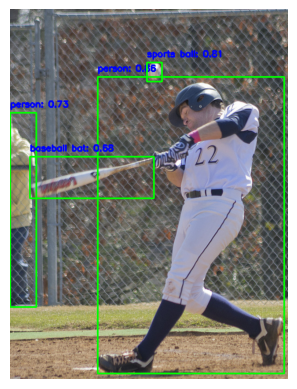

In [6]:
# Load an image
image_path = "./test_img_1.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image)

# Display the detected objects
for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes (x_min, y_min, x_max, y_max)
    confidences = result.boxes.conf  # Confidence scores
    class_ids = result.boxes.cls  # Class IDs

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(class_ids[i])]}: {confidences[i]:.2f}"

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (250, 2, 0), 2)

# Convert BGR to RGB and show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
